# Exploration des données #
## Le dataset étant constitué de données pour 15 personnes, on observe déjà les données pour la première afin d'en avoir une meilleure compréhension globale 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

import pickle

In [2]:
data_exp = pd.read_pickle("./S1/S1.pkl")

In [3]:
data_exp

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224]),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
          [-273.15]], dt

## On obtient un dictionnaire contenant diverses informations telles que les attributs physiques de la personne et ses résultats aux différents tests physiques

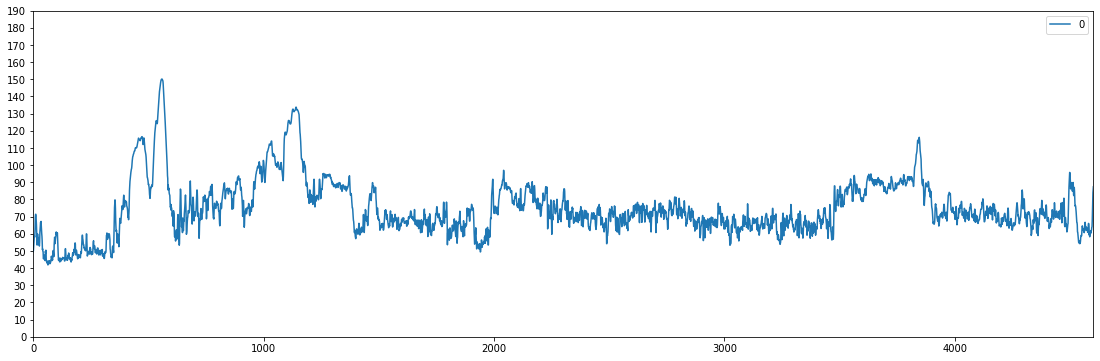

In [4]:
data_exp_label = pd.DataFrame(data_exp['label'])
data_exp_label.plot(yticks=range(0,200,10),figsize=(19,6))


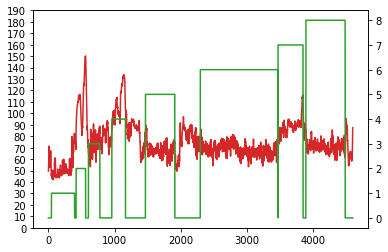

In [5]:
data_exp_act = pd.DataFrame(data_exp['activity'])
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(data_exp_label.index, data_exp_label, color=color)
ax1.tick_params(axis='y')
ax1.set_yticks(range(0,200,10))


ax2 = ax1.twinx()

color = 'tab:green'
ax2.plot(data_exp_act.index*(len(data_exp_label)/len(data_exp_act)), data_exp_act, color=color)
ax2.tick_params(axis='y')

plt.show()

### La dernière figure montre bien le lien entre l'activité physique du sujet et son rythme cardiaque
### En se basant uniquement sur ce graphe on pourrait se dire qu'il suffit uniquement de prendre le rythme cardiaque pour définir l'acitivité en cours, cependant le rythme dépend aussi de nombreuses variables telles que le poids, ou encore la taille et il sera donc nécessaire de vérifier la corrélation de toutes ces variables avec l'activité

# Regroupement de toutes les données

In [6]:
allusers = {}
for i in range(1,16):
    print(i)
    allusers[i] = pd.read_pickle(f"./S"+str(i)+"/S"+str(i)+".pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [7]:
df = pd.DataFrame(allusers)

In [8]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
rpeaks,"[240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...","[33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...","[337, 1103, 1897, 2673, 3496, 4295, 5103, 5901...","[206, 910, 1510, 2150, 2768, 3331, 3911, 4505,...","[71, 519, 976, 1440, 1874, 2331, 2783, 3225, 3...","[31, 464, 891, 1313, 1726, 2132, 2534, 2924, 3...","[633, 1428, 2197, 2971, 3739, 4507, 5241, 5963...","[217, 960, 1697, 2433, 3116, 3836, 4560, 5297,...","[486, 1161, 1829, 2473, 3095, 3709, 4291, 4886...","[560, 1194, 1851, 2503, 3168, 3800, 4448, 5137...","[553, 1181, 1804, 2417, 3009, 3591, 4121, 4655...","[669, 1496, 2303, 3089, 3838, 4552, 5267, 5989...","[226, 961, 1673, 2376, 2968, 3585, 4253, 4867,...","[7, 707, 1377, 2028, 2629, 3162, 3678, 4199, 4...","[506, 1267, 2097, 2945, 3778, 4607, 5380, 6170..."
signal,{'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...,{'chest': {'ACC': [[0.91139996 0.03219998 0.05...,{'chest': {'ACC': [[ 0.90460002 -0.06120002 -0...,{'chest': {'ACC': [[ 0.90859997 -0.15979999 0...,{'chest': {'ACC': [[ 0.88940001 -0.25019997 -0...,{'chest': {'ACC': [[ 0.79540002 -0.167 -0...,{'chest': {'ACC': [[ 0.87160003 0.02540004 -0...,{'chest': {'ACC': [[ 0.90740001 -0.04100001 0...,{'chest': {'ACC': [[ 0.84739995 -0.00819999 -0...,{'chest': {'ACC': [[ 0.91760004 -0.01779997 -0...,{'chest': {'ACC': [[ 0.91779995 -0.0054 0...,{'chest': {'ACC': [[ 0.89100003 -0.01200002 -0...,{'chest': {'ACC': [[0.89300001 0.06099999 0.17...,{'chest': {'ACC': [[ 0.89300001 0.12619996 -0...,{'chest': {'ACC': [[ 0.86740005 0.16139996 -0...
label,"[49.611369076105795, 50.323992482870175, 52.70...","[70.92296570347261, 71.29105527689472, 68.6938...","[52.904905990895365, 52.4832848965976, 53.5990...","[69.33133569178202, 74.23985397460334, 80.6865...","[96.0906143466522, 101.29797045926367, 108.862...","[105.03603052300089, 109.08819284696261, 111.7...","[54.71764132217654, 55.17330164858371, 55.3930...","[57.91516848266533, 59.1418718794675, 61.37444...","[66.60310756946997, 66.72622532983297, 67.1437...","[64.28235587205951, 63.349710123072235, 64.568...","[73.41463469471395, 78.43265402408036, 82.3741...","[54.98420867920524, 56.68301554508546, 58.1600...","[63.79889727455826, 65.42809985054454, 65.7692...","[72.6747289184089, 76.95480136227845, 73.42384...","[51.789772141788326, 53.95587356823631, 59.379..."
activity,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
questionnaire,"{'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H...","{'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H...","{'WEIGHT': 60.0, 'Gender': ' m', 'AGE': 25, 'H...","{'WEIGHT': 57.0, 'Gender': ' m', 'AGE': 25, 'H...","{'WEIGHT': 70.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 70.0, 'Gender': ' f', 'AGE': 37, 'H...","{'WEIGHT': 58.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 70.0, 'Gender': ' m', 'AGE': 43, 'H...","{'WEIGHT': 60.0, 'Gender': ' f', 'AGE': 28, 'H...","{'WEIGHT': 56.0, 'Gender': ' f', 'AGE': 55, 'H...","{'WEIGHT': 62.0, 'Gender': ' f', 'AGE': 24, 'H...","{'WEIGHT': 105.0, 'Gender': ' m', 'AGE': 43, '...","{'WEIGHT': 63.0, 'Gender': ' f', 'AGE': 21, 'H...","{'WEIGHT': 67.0, 'Gender': ' f', 'AGE': 26, 'H...","{'WEIGHT': 79.0, 'Gender': ' m', 'AGE': 28, 'H..."
subject,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15


In [9]:
df.sum

<bound method DataFrame.sum of                                                               1   \
rpeaks         [240, 1174, 2128, 3099, 3907, 4733, 5404, 6382...   
signal         {'chest': {'ACC': [[ 0.85640001 -0.06779999 -0...   
label          [49.611369076105795, 50.323992482870175, 52.70...   
activity       [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
questionnaire  {'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'H...   
subject                                                       S1   

                                                              2   \
rpeaks         [33, 700, 1316, 1932, 2536, 3094, 3661, 4220, ...   
signal         {'chest': {'ACC': [[0.91139996 0.03219998 0.05...   
label          [70.92296570347261, 71.29105527689472, 68.6938...   
activity       [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
questionnaire  {'WEIGHT': 80.0, 'Gender': ' m', 'AGE': 28, 'H...   
subject                                                       S2   

               

## Nous avons deux problématiques afin de pouvoir insérer ces données dans un modèle : premièrement, il faut mettre les données à la même échelle, il faut ensuite sortir toutes les données de leurs listes respectives

In [10]:
def to_4h(data, freq):
    to_scale = []
    n_div = int(freq/4)
    
    for i in range(0, len(data), n_div):
        to_scale.append((sum(data[i:i+n_div])/n_div))
    return to_scale

In [11]:
for i,j in allusers.items():
    dact = pd.DataFrame.from_dict(j["activity"])
    dact.rename(columns={0:'activity'}, inplace=True)
    
    temp=j['label'].repeat(len(j['activity'])/len(j['label'])).tolist()
    temp.extend([statistics.mean(j['label'])] * (len(j['activity'])-len(temp)))
    
    dlabel = pd.DataFrame(temp)
    dlabel.rename(columns={0:'label'}, inplace=True)
    
    j["signal"]["chest"]["ECG"] = to_4h(j["signal"]["chest"]["ECG"], 700)
    decg =pd.DataFrame.from_dict(j["signal"]["chest"]["ECG"])
    decg.rename(columns={0:'ecg'}, inplace=True)
    
    j["signal"]["chest"]["ACC"] = to_4h(j["signal"]["chest"]["ACC"], 700)
    dchest = pd.DataFrame.from_dict(j["signal"]["chest"]["ACC"])
    dchest.rename(columns={0:'xchest',1:'ychest',2:'zchest'}, inplace=True)
    
    j["signal"]["chest"]["Resp"] = to_4h(j["signal"]["chest"]["Resp"], 700)    
    dresp=pd.DataFrame.from_dict(j["signal"]["chest"]["Resp"])
    dresp.rename(columns={0:'resp'}, inplace=True)
    
    chestall = pd.concat([dchest, decg , dresp], axis=1)
    
    dsig=pd.DataFrame.from_dict(j["signal"]["wrist"]["TEMP"])
    dsig.rename(columns={0:'temp'}, inplace=True)
    
    j["signal"]["wrist"]["ACC"] = to_4h(j["signal"]["wrist"]["ACC"], 32)
    dwrist = pd.DataFrame.from_dict(j["signal"]["wrist"]["ACC"])
    dwrist.rename(columns={0:'xwrist', 1:'ywrist', 2:'zwrist'}, inplace=True)
    
    j["signal"]["wrist"]["BVP"] = to_4h(j["signal"]["wrist"]["BVP"], 64)
    dbvp=pd.DataFrame.from_dict(j["signal"]["wrist"]["BVP"])
    dbvp.rename(columns={0:'bvp'}, inplace=True )
    
    wristall = pd.concat([dwrist, dbvp, dsig], axis=1)
    
    did=pd.DataFrame([j['subject'][1:]] * len(wristall))
    did.rename(columns = {0:'IDSubject'}, inplace=True)
    
    ques = j["questionnaire"]
    dques = pd.DataFrame.from_dict(ques, orient = 'index').T
    dques = pd.concat([dques]*len(wristall), ignore_index=True)
    dfdatas = pd.concat([did,dques,dact,dlabel,chestall, wristall], axis=1)
    
    allusers[i] = dfdatas

In [12]:
data_concat = pd.concat([allusers[1],allusers[2],allusers[3],allusers[4],allusers[5],allusers[6],allusers[7],allusers[8],allusers[9],allusers[10],allusers[11],allusers[12],allusers[13],allusers[14],allusers[15]])
data_concat

,IDSubject,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,activity,label,xchest,ychest,zchest,ecg,resp,xwrist,ywrist,zwrist,bvp,temp
0,1,78,m,34,182,3,6,0.0,49.611369,0.852157,-0.066488,-0.367784,0.035650,4.834438,-0.763672,-0.076172,0.669922,0.138125,32.13
1,1,78,m,34,182,3,6,0.0,49.611369,0.851262,-0.066655,-0.370442,0.103145,4.238839,-0.763672,-0.078125,0.671875,-26.262500,32.16
2,1,78,m,34,182,3,6,0.0,49.611369,0.851570,-0.064677,-0.370251,0.099101,2.058559,-0.761719,-0.078125,0.671875,-40.959375,32.16
3,1,78,m,34,182,3,6,0.0,49.611369,0.852142,-0.065486,-0.371278,-0.170757,-0.463981,-0.753906,-0.078125,0.671875,24.173125,32.16
4,1,78,m,34,182,3,6,0.0,49.611369,0.851958,-0.065894,-0.370466,-0.036633,-1.867397,-0.761719,-0.076172,0.671875,25.781250,32.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31751,15,79,m,28,183,2,5,0.0,79.664230,0.891137,-0.003744,-0.235411,-0.153640,1.664638,-0.515625,0.863281,0.140625,-19.655000,33.99
31752,15,79,m,28,183,2,5,0.0,79.664230,0.899386,-0.015863,-0.220926,-0.007924,-0.338684,-0.656250,0.716797,-0.304688,21.031250,33.99
31753,15,79,m,28,183,2,5,0.0,79.664230,0.903733,-0.007829,-0.219377,0.117915,-1.616098,-0.449219,0.474609,-0.671875,9.114375,33.99
31754,15,79,m,28,183,2,5,0.0,79.664230,0.889470,0.015502,-0.211233,-0.184228,-2.403059,-0.404297,0.328125,-0.841797,-24.615625,33.99


In [13]:
data_concat.sum

<bound method DataFrame.sum of       IDSubject WEIGHT Gender AGE HEIGHT SKIN SPORT  activity      label  \
0             1     78      m  34    182    3     6       0.0  49.611369   
1             1     78      m  34    182    3     6       0.0  49.611369   
2             1     78      m  34    182    3     6       0.0  49.611369   
3             1     78      m  34    182    3     6       0.0  49.611369   
4             1     78      m  34    182    3     6       0.0  49.611369   
...         ...    ...    ...  ..    ...  ...   ...       ...        ...   
31751        15     79      m  28    183    2     5       0.0  79.664230   
31752        15     79      m  28    183    2     5       0.0  79.664230   
31753        15     79      m  28    183    2     5       0.0  79.664230   
31754        15     79      m  28    183    2     5       0.0  79.664230   
31755        15     79      m  28    183    2     5       0.0  79.664230   

         xchest    ychest    zchest       ecg      resp 

In [14]:
corr = data_concat.corr()
corr.style.background_gradient(cmap='coolwarm')

,activity,label,xchest,ychest,zchest,ecg,resp,xwrist,ywrist,zwrist,bvp,temp
activity,1,-0.150687,-0.0750888,-0.0528789,-0.135278,0.00138223,-0.000167506,0.0270732,-0.302148,0.190453,-6.67959e-06,0.322595
label,-0.150687,1,0.112439,-0.00016065,0.308321,-0.00042304,-0.00014913,0.142107,0.257929,-0.140871,-0.000239047,0.0587271
xchest,-0.0750888,0.112439,1,-0.113325,0.37018,0.0314683,-0.00902498,-0.0435131,0.0920378,-0.174834,0.00170248,-0.00415767
ychest,-0.0528789,-0.00016065,-0.113325,1,-0.067115,0.0267441,-0.00010038,0.018377,0.0374719,0.0437458,0.00196356,0.111615
zchest,-0.135278,0.308321,0.37018,-0.067115,1,0.00454501,-0.00974918,0.00802707,0.243885,-0.152929,0.000454095,-0.123642
ecg,0.00138223,-0.00042304,0.0314683,0.0267441,0.00454501,1,0.0112938,1.60183e-05,0.00218143,-0.00129812,0.00732712,0.00170176
resp,-0.000167506,-0.00014913,-0.00902498,-0.00010038,-0.00974918,0.0112938,1,0.00279184,0.00227496,0.000549528,0.000179642,8.16464e-05
xwrist,0.0270732,0.142107,-0.0435131,0.018377,0.00802707,1.60183e-05,0.00279184,1,0.0586495,0.285358,0.0119501,0.0112571
ywrist,-0.302148,0.257929,0.0920378,0.0374719,0.243885,0.00218143,0.00227496,0.0586495,1,-0.113589,-0.00391356,-0.115373
zwrist,0.190453,-0.140871,-0.174834,0.0437458,-0.152929,-0.00129812,0.000549528,0.285358,-0.113589,1,0.00322422,0.0385143


In [35]:
x = data_concat[['AGE','SPORT','WEIGHT','HEIGHT','label','zchest','ywrist','zwrist','temp']]
y = data_concat[['activity']]

In [45]:
print(data_concat)

      IDSubject WEIGHT Gender AGE HEIGHT SKIN SPORT  activity      label  \
0             1     78      m  34    182    3     6       0.0  49.611369   
1             1     78      m  34    182    3     6       0.0  49.611369   
2             1     78      m  34    182    3     6       0.0  49.611369   
3             1     78      m  34    182    3     6       0.0  49.611369   
4             1     78      m  34    182    3     6       0.0  49.611369   
...         ...    ...    ...  ..    ...  ...   ...       ...        ...   
31751        15     79      m  28    183    2     5       0.0  79.664230   
31752        15     79      m  28    183    2     5       0.0  79.664230   
31753        15     79      m  28    183    2     5       0.0  79.664230   
31754        15     79      m  28    183    2     5       0.0  79.664230   
31755        15     79      m  28    183    2     5       0.0  79.664230   

         xchest    ychest    zchest       ecg      resp    xwrist    ywrist  \
0      0

## Maintenant qu'on a fait le preprocessing, on peut passer au modèle

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y.values.ravel(),random_state = 211308)

### Random Forest

In [37]:
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
model.score(x_test, y_test)

0.9780830804160972

In [39]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     35276
         1.0       1.00      1.00      1.00      9226
         2.0       0.98      0.94      0.96      6335
         3.0       0.97      0.94      0.96      4599
         4.0       0.99      0.99      0.99      7004
         5.0       0.98      0.99      0.99     13724
         6.0       0.99      0.98      0.98     27034
         7.0       0.96      0.96      0.96      9350
         8.0       0.99      0.99      0.99     16941

    accuracy                           0.98    129489
   macro avg       0.98      0.97      0.98    129489
weighted avg       0.98      0.98      0.98    129489



### Gradient Boosting

In [20]:
gboostmodel = GradientBoostingClassifier(n_estimators=100, random_state=211308)
gboostmodel.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=211308, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
gboostmodel.score(x_test,y_test)

0.8112735444709589

In [22]:
print(classification_report(y_test, gboostmodel.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74     35276
         1.0       0.94      0.94      0.94      9226
         2.0       0.88      0.68      0.77      6335
         3.0       0.90      0.58      0.71      4599
         4.0       0.94      0.96      0.95      7004
         5.0       0.84      0.84      0.84     13724
         6.0       0.83      0.85      0.84     27034
         7.0       0.75      0.70      0.72      9350
         8.0       0.83      0.84      0.84     16941

    accuracy                           0.81    129489
   macro avg       0.85      0.80      0.82    129489
weighted avg       0.81      0.81      0.81    129489



## Les deux modèles donnent de bons résultats, avec des résultats surprenamment haut du RandomForest, notamment pour la montée d'escalier avec une précision et un recall parfaits

### On enregistre les modèles pour utilisation dans l'API

In [23]:
classimodelname = "rfclassi.sav"
pickle.dump(model, open(classimodelname, 'wb'))

In [24]:
boostmodelname = "boostclassi.sav"
pickle.dump(gboostmodel, open(boostmodelname, 'wb'))